<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Classification----Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Mobile Price Range Prediction</font>

### <font color='red'> Problem Statement </font>

The smartphones market is a highly competitive market where Most of companies keep launching new models with small technology changes such as battery power, camera configuration, and processor.So we have to understand how the features of mobile phone affect the price range. 

### <font color='red'> Business Context </font>

In the competitive mobile phone market, companies want to understand mobile phone sales data and the factors driving the prices. The objective is to find out some relation between the features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### Dataset Description

* **Battery_power** - Battery capacity in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera mega pixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory capacity in  Gigabytes
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores of processor
* **Pc** - Primary Camera mega pixels
* **Px_height** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in Mega
* **Touch_screen** - Has touch screen or not
* **Wifi** - wifi is present or not
* **Sc_h** - Screen Height in cm
* **Sc_w** - Screen Width in cm
* **Talk_time** - longest time that a single battery charge will last when you are
* **Three_g** - 3G is present or not
* **Wifi** -  wifi is present or not
* **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost),3(very high cost)


### Import and installing models

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [81]:
# importing csv files as dataframe
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df=pd.read_csv("/content/drive/MyDrive/Projects/ Supervised ML Classification (Mobile Price Range Prediction)  )/data_mobile_price_range.csv")

### Data Inspection

In [82]:
df.shape

(2000, 21)

In [83]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [84]:
df.tail(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### <font color='orange'> Observation </font>

* This is small dataset with total 2000 rows and 21 columns 
* The `price_range` feature is dependent where othere 20 features are independent

### Different Datatypes and Unique Values 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [86]:
# checking all values including categorical data
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
# Checking number of unique values for each feature
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [88]:
# value_counts() : number of values for each category of the features
# (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

for i in df.columns:
  if len(df[i].value_counts()) >10:
    continue
  print(i)
  print(df[i].unique())
  print("-"*50)

blue
[0 1]
--------------------------------------------------
dual_sim
[0 1]
--------------------------------------------------
four_g
[0 1]
--------------------------------------------------
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
--------------------------------------------------
n_cores
[2 3 5 6 1 8 4 7]
--------------------------------------------------
three_g
[0 1]
--------------------------------------------------
touch_screen
[0 1]
--------------------------------------------------
wifi
[1 0]
--------------------------------------------------
price_range
[1 2 3 0]
--------------------------------------------------


### <font color='red'>Checking Null or Missing Values</font>

In [89]:
# Return dataset with boolean values with presence of null equal to True
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
 
df.isna().sum().sum()

0

### <font color='orange'> Observation </font>

* The dataset don't contain any missing values.
* The various features are binary such as `blue`,`dual_sim`,`four_g`,`three_g`,`touch_screen`,`wifi`, etc
* The columns with numerical data are `battery_power, clock_speed, fc,int_memory ,m_depth ,mobile_wt ,n_cores ,pc ,px_height ,px_width ,ram ,sc_h ,sc_w ,talk_time, n_cores`

### Checking Duplicate Values

In [90]:
# duplicated() : Return boolean Series denoting duplicate rows.
# (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

len(df[df.duplicated()])

0

### <font color='orange'>Observation</font>

* The dataset don't have any duplicate values.


## **<font color='red'> Exploratory Data Analysis </font>**

* With the help of exploratory data analysis we will find the trends and patterns in the data and make our conclusion
* We will use matplotlib,Seaborn for visualization and pandas to explore data

### <font color='red'> Hypothesis </font>
by just observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed.

* As the values of features `'battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'` increases the price range will increase
* As for binary features such as ` blue,three_g,four_g,wifi` if they are true (present) the values will be higher range.


### Function for PDF and CDF

In [91]:
# Function for pdf and histogram of feature

def PDF (hue,feature):
  """This will plot pdf and Histograme of feature"""  
  
  sns.FacetGrid(df,hue=hue,size=5)\
  .map(sns.distplot,feature)\
  .add_legend();
  plt.title("histogram and  PDF of " + str(feature))
  plt.show()

In [92]:
# Function for pdf and cdf of a feature

def CDF(feature):
  "This will plot cdf of feature"
  df0=df[df["price_range"]==0]
  df1=df[df["price_range"]==1]
  df2=df[df["price_range"]==2]
  df3=df[df["price_range"]==3]

  counts,bin_edges=np.histogram(df0[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 0 CDF")

  counts,bin_edges=np.histogram(df1[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 1 CDF")

  counts,bin_edges=np.histogram(df2[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 2 CDF")

  counts,bin_edges=np.histogram(df3[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 3 CDF")

  plt.legend()
  plt.grid()
  plt.ylabel("probability")
  plt.xlabel(feature)
  plt.title(feature)
  plt.show()


### 1. Visualizing the Distribution of battery power across the price range.

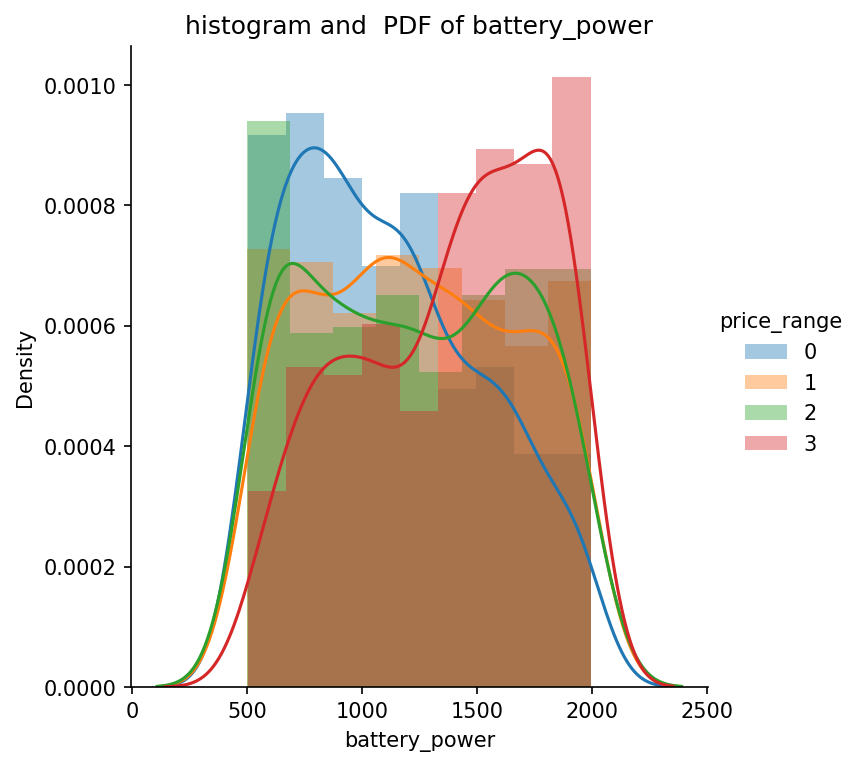

In [93]:
PDF("price_range","battery_power")

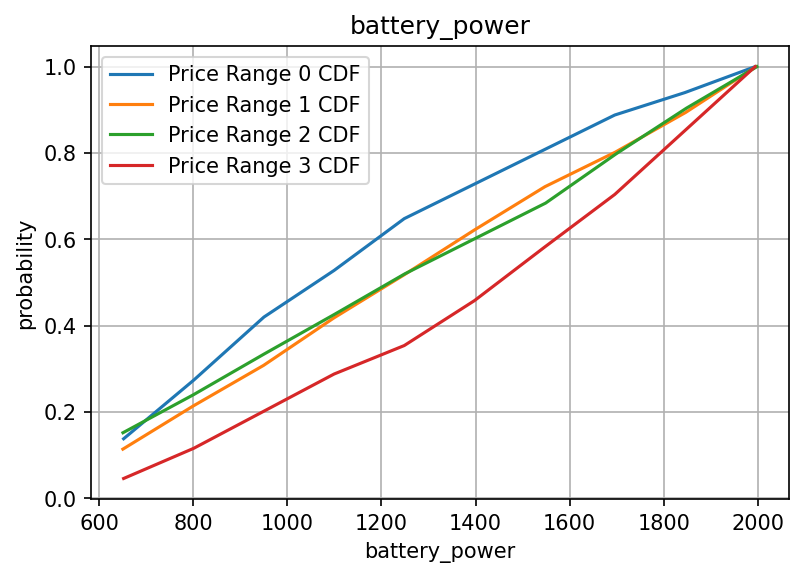

In [94]:
CDF("battery_power")

### <font color='orange'>Observation</font>

*  For PDF we can see that the category 0 and 3 of price range are partially seperable.
*  Where distribution of battery power for category 1 and 2 are not seperable.
*  greater than 70% datapoints of class 0 comes under battery power of 1400 where around 45% datapoints comes under 1400.

### 2. Visualizing the Distribution of clock speed across the price range.

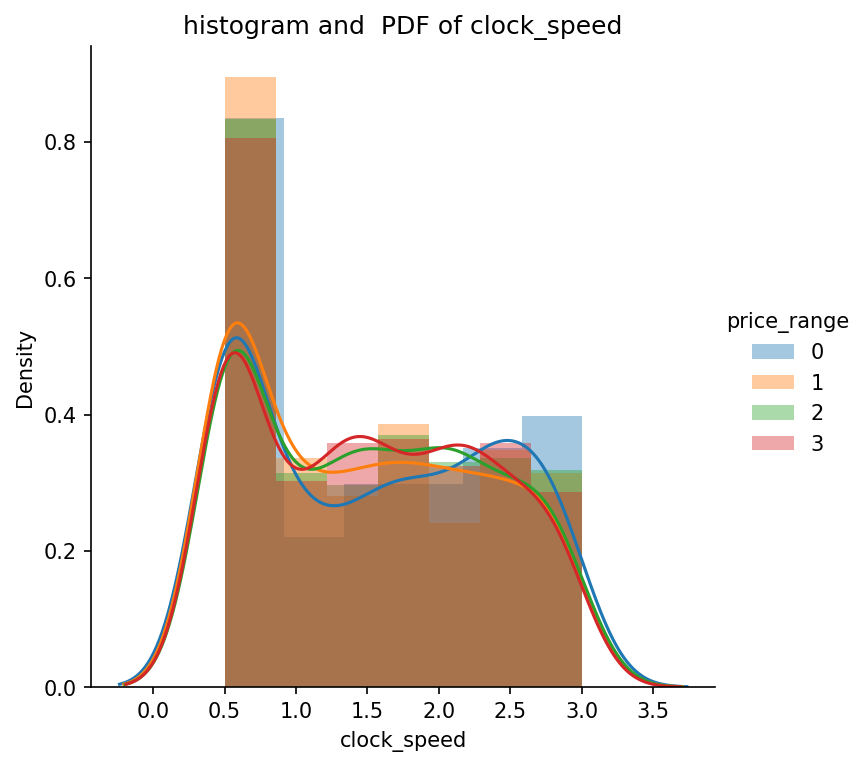

In [95]:
PDF("price_range","clock_speed")

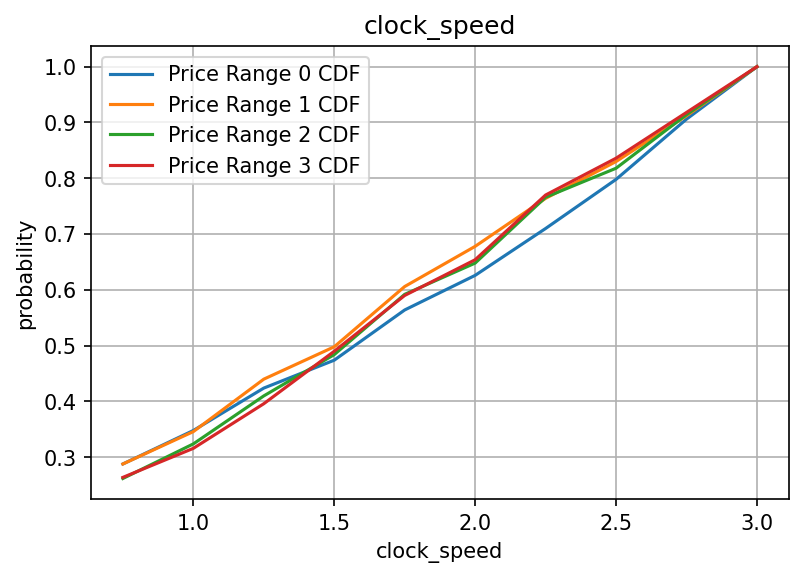

In [96]:
CDF("clock_speed")

### <font color='orange'>Observation</font>

*  The PDF of clock speed of every price range is very similar and concatinating 
*  Values are in range of 0.5 to 3.

### 3. Visualizing the Distribution of battery power across the price range.

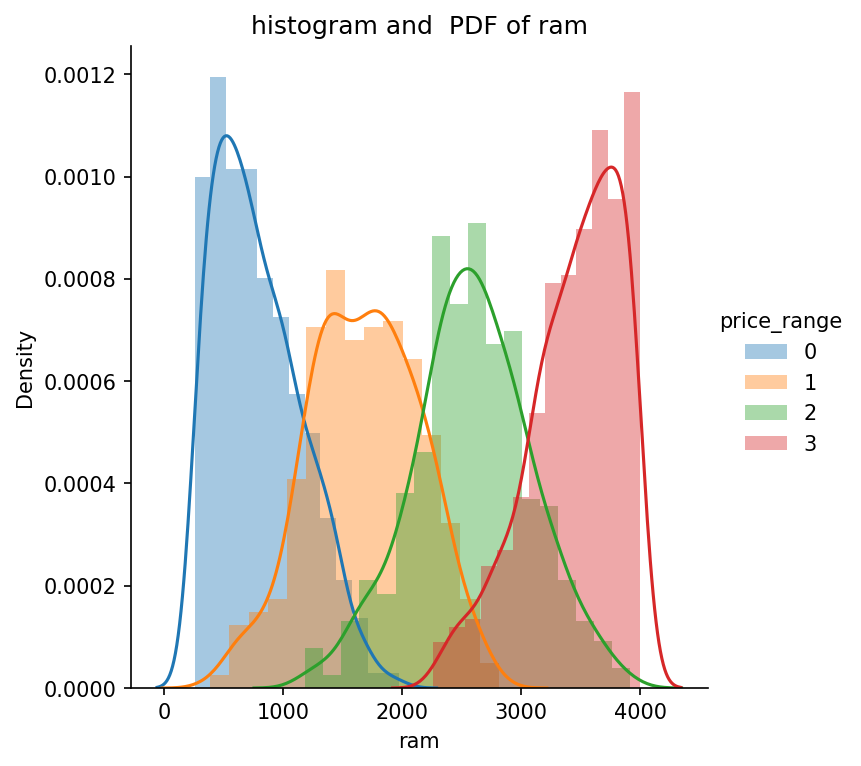

In [97]:
PDF("price_range","ram")

In [98]:
print("0:",df[df["price_range"]==0]["ram"].mean())
print("1:",df[df["price_range"]==1]["ram"].mean())
print("2:",df[df["price_range"]==2]["ram"].mean())
print("3:",df[df["price_range"]==3]["ram"].mean())

0: 785.314
1: 1679.49
2: 2582.816
3: 3449.232


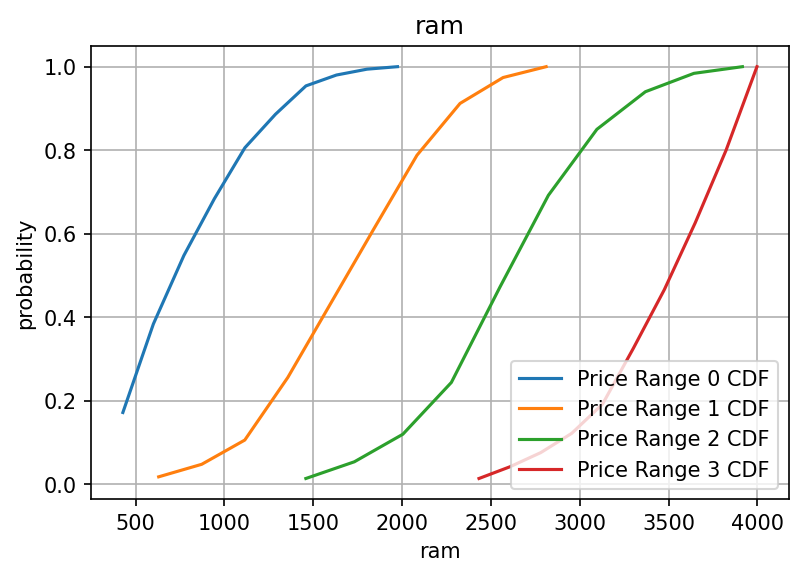

In [99]:
CDF("ram")

### <font color='orange'>Observation</font>

*  For each class PDF of ram shows good seperation.
*  Mean of ram for class 0,1,2,3 are 785.314 ,1679.49 ,2582.816 , 3449.232 respectively

### 4. Visualizing Distribution of remaining features 

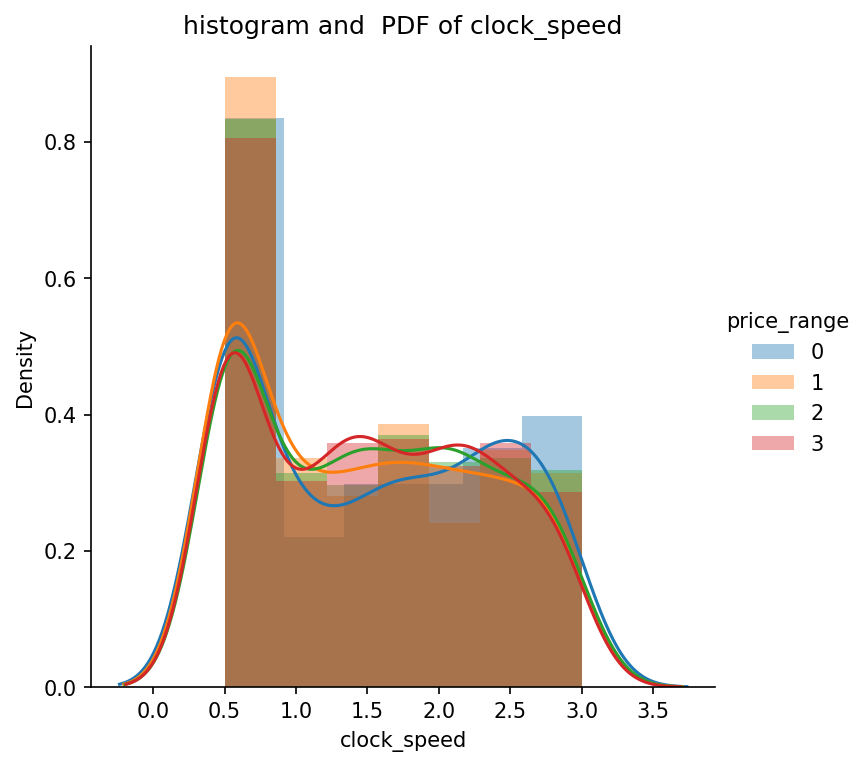

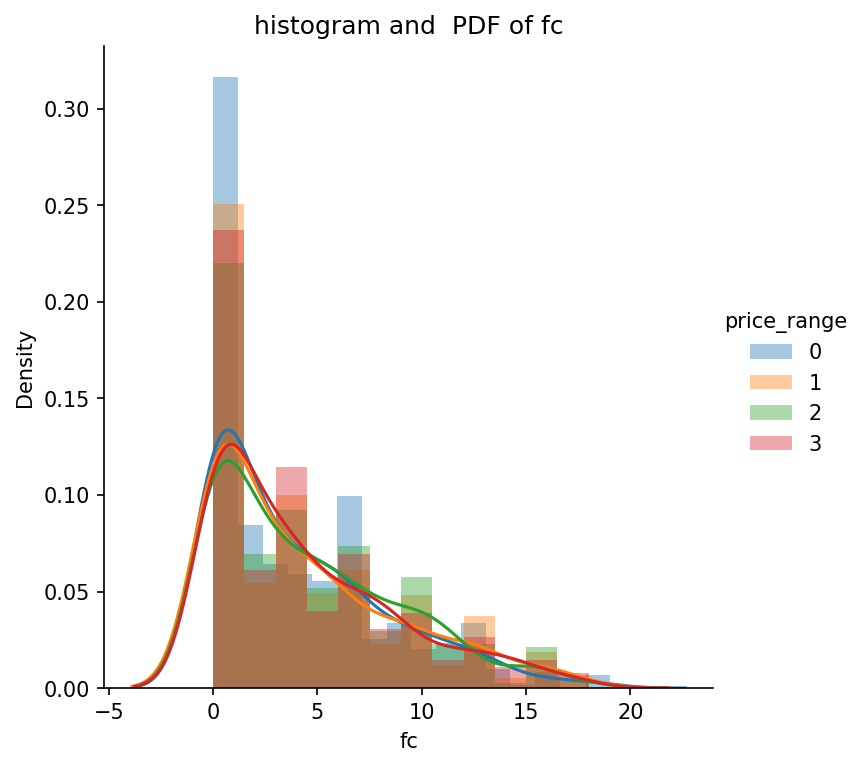

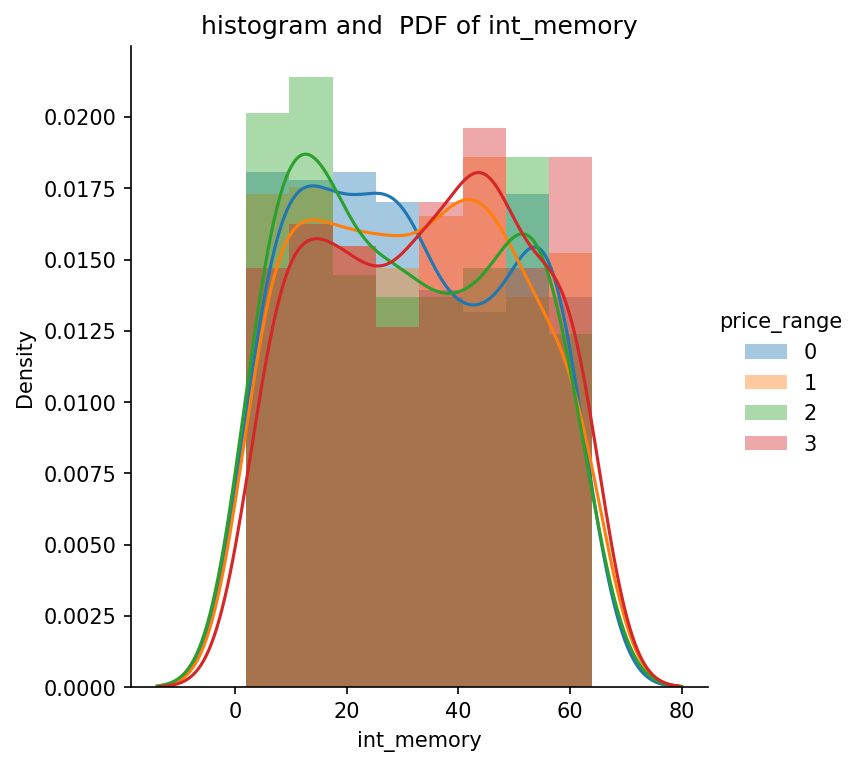

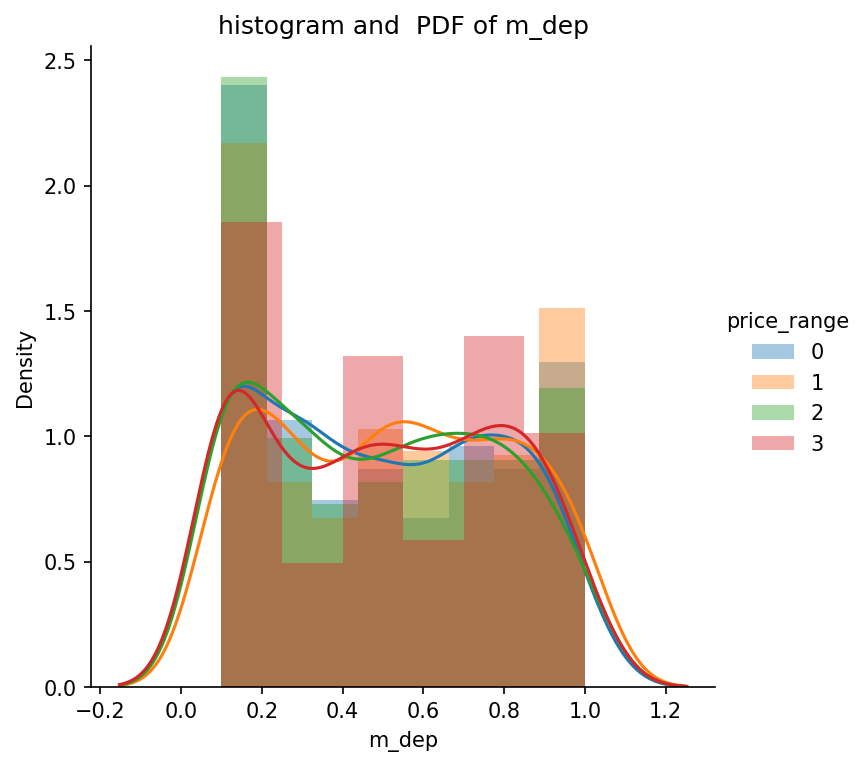

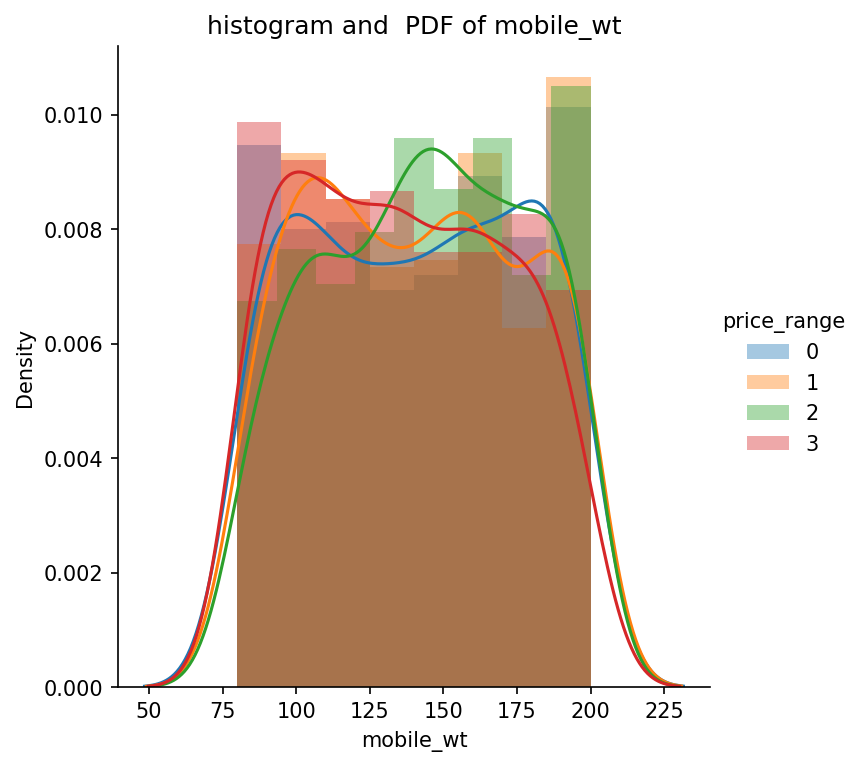

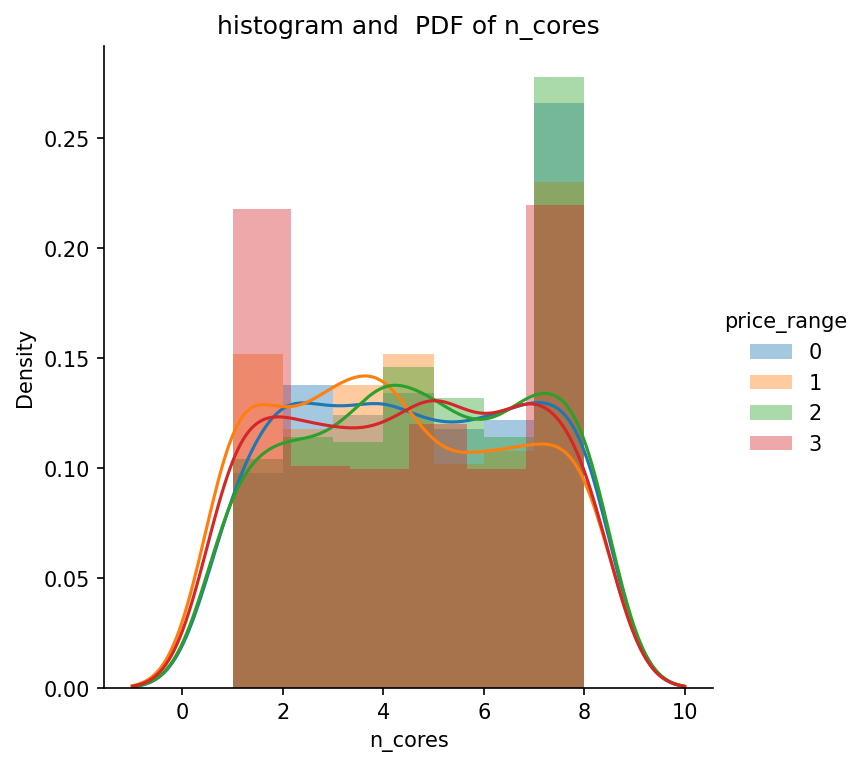

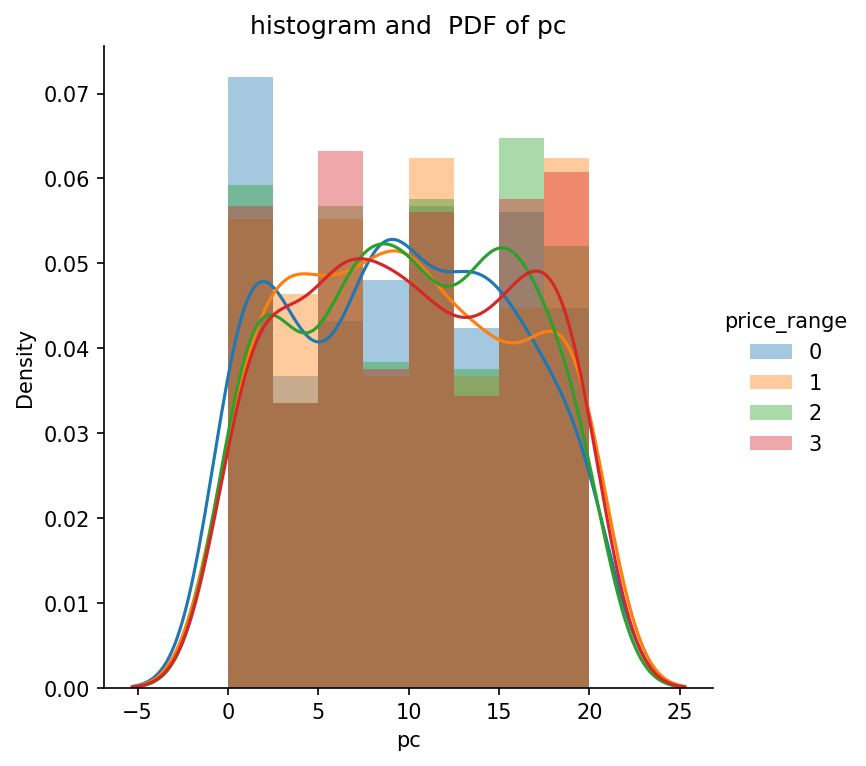

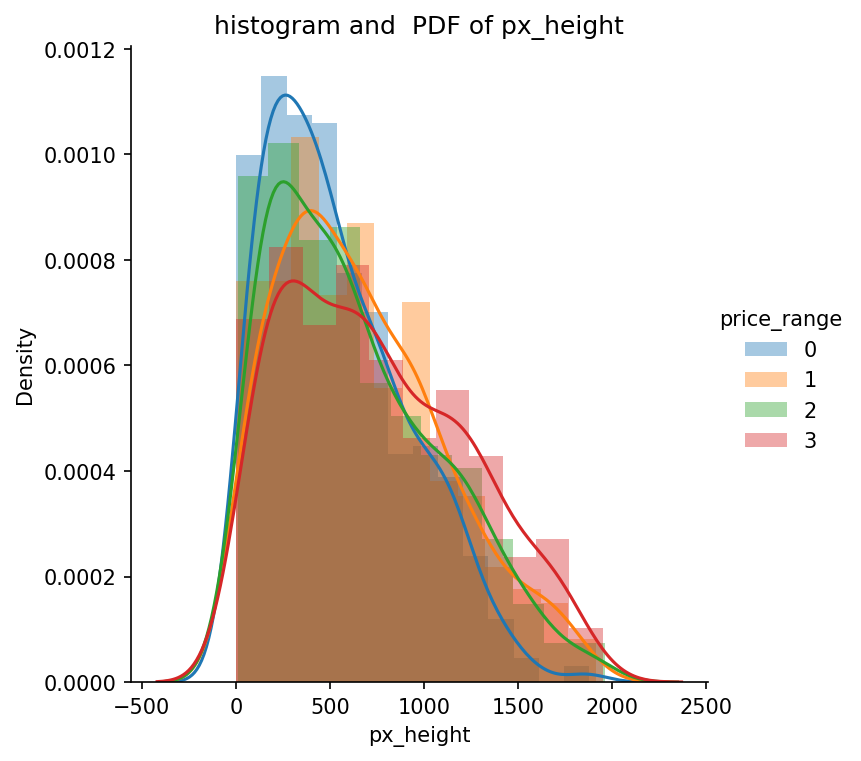

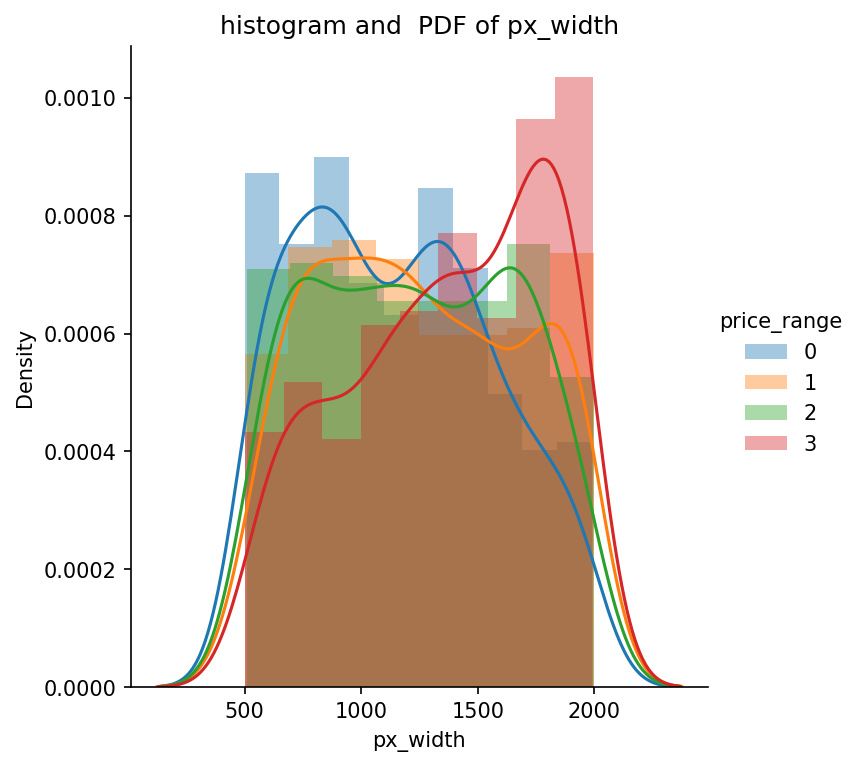

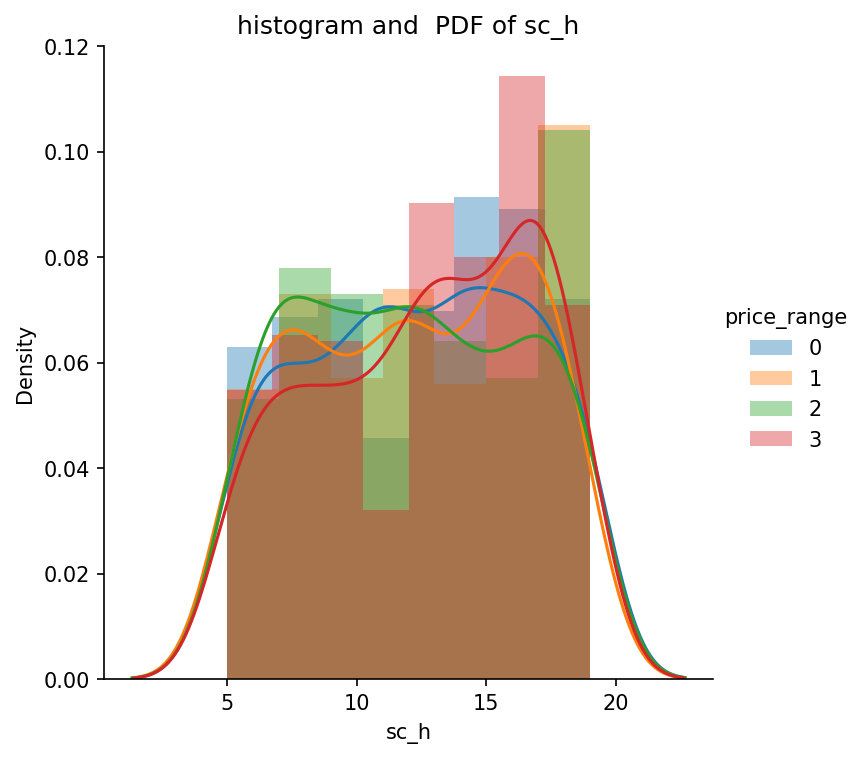

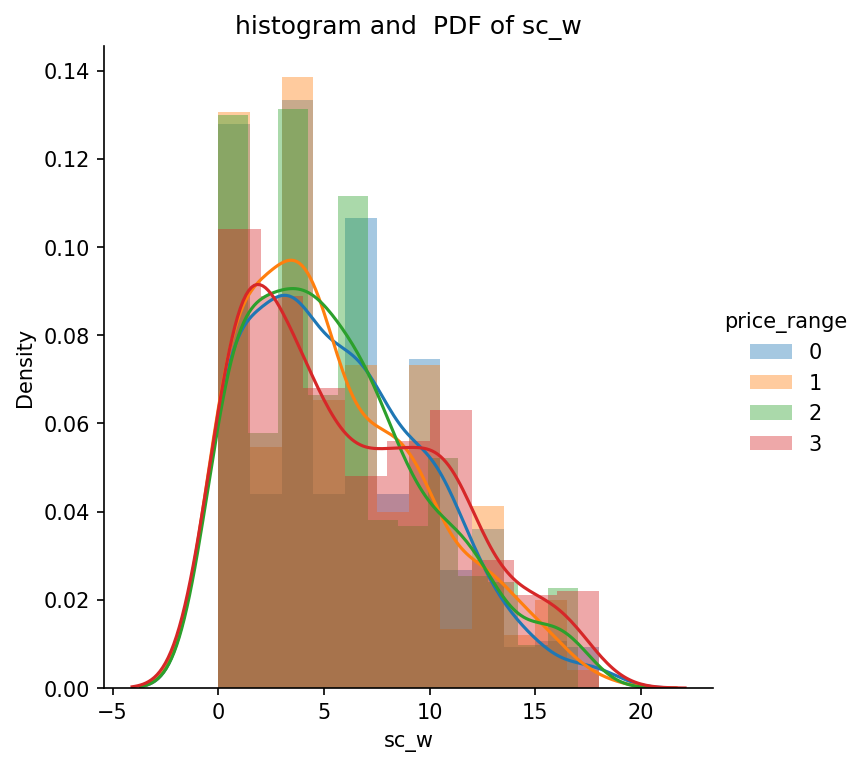

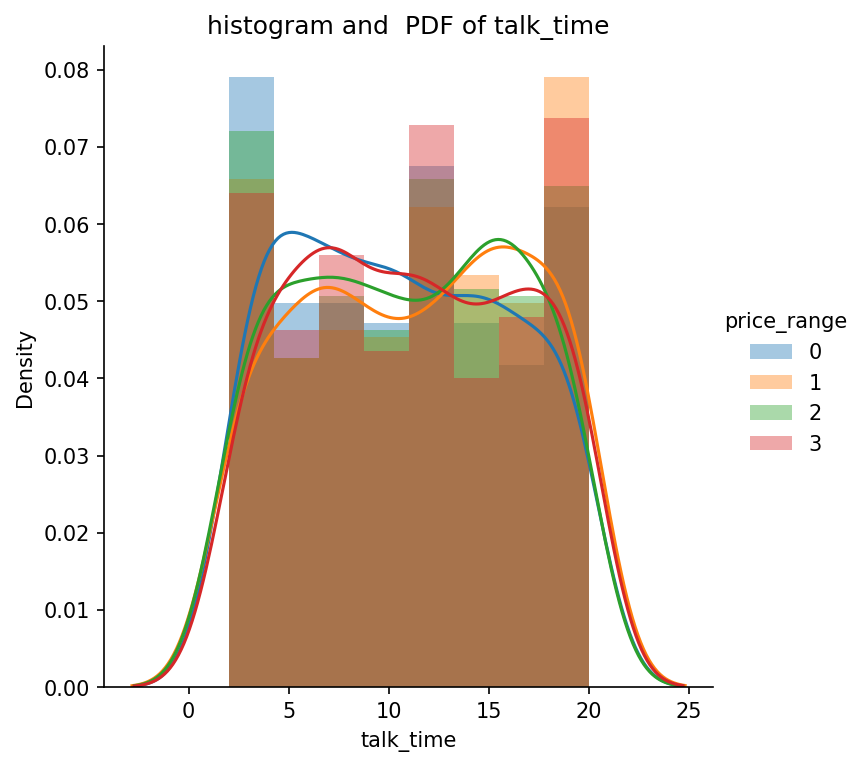

In [100]:
for i in ["clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","sc_h","sc_w","talk_time"]:
  PDF("price_range",i)

### <font color='orange'>Observation</font>

* For above features the overlapping is too much so it is difficult to seperate the classes.
* This could be because as time passes new models contain some of the features of higher price range in lower price range.

### Lets see countplot on various binary features.

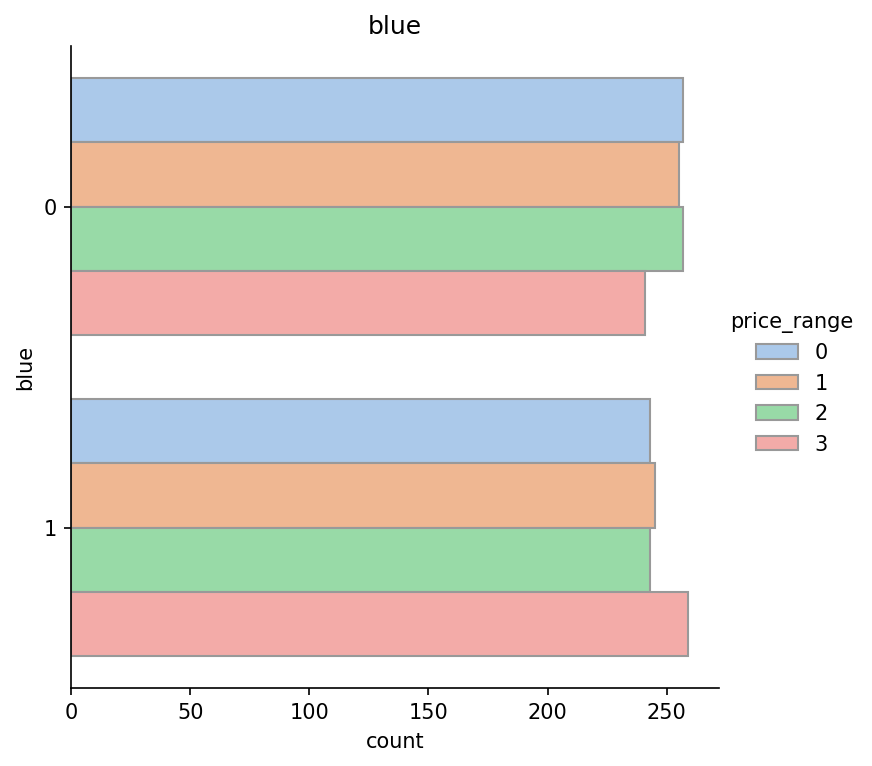

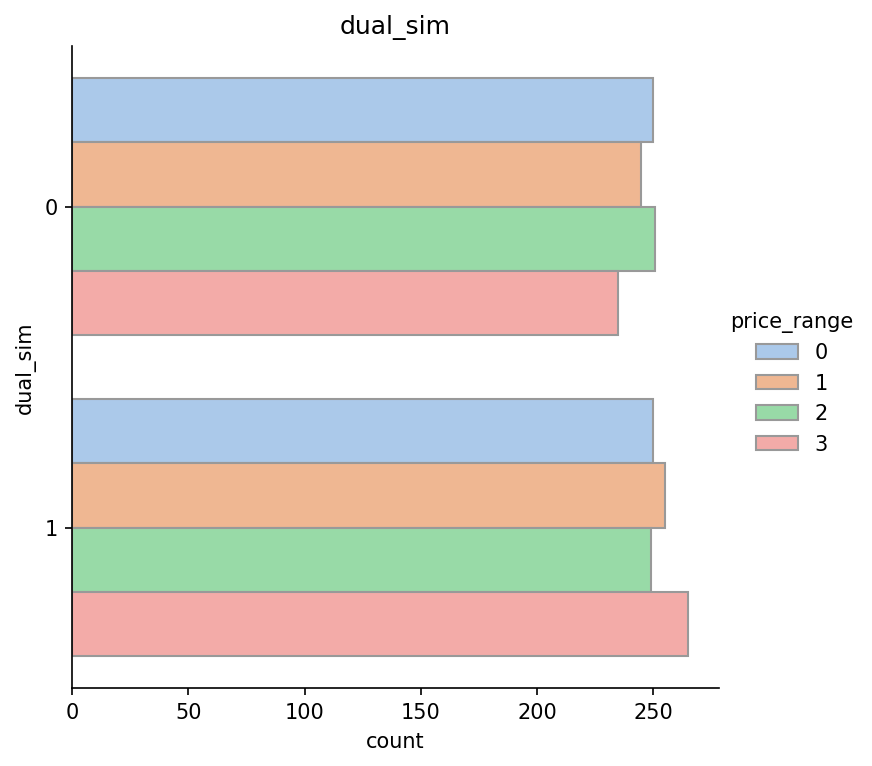

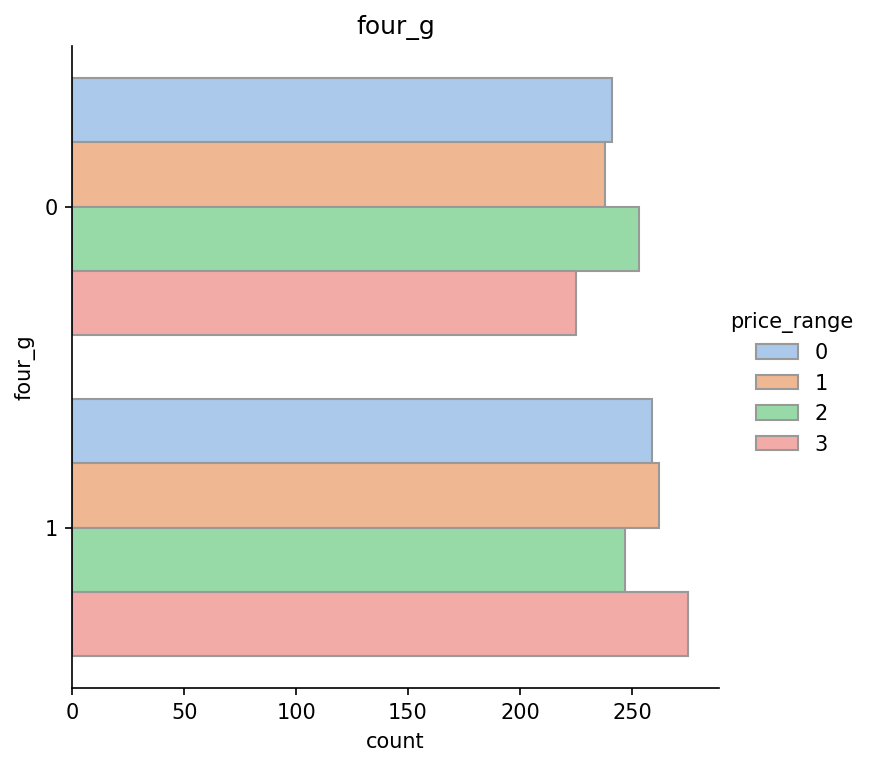

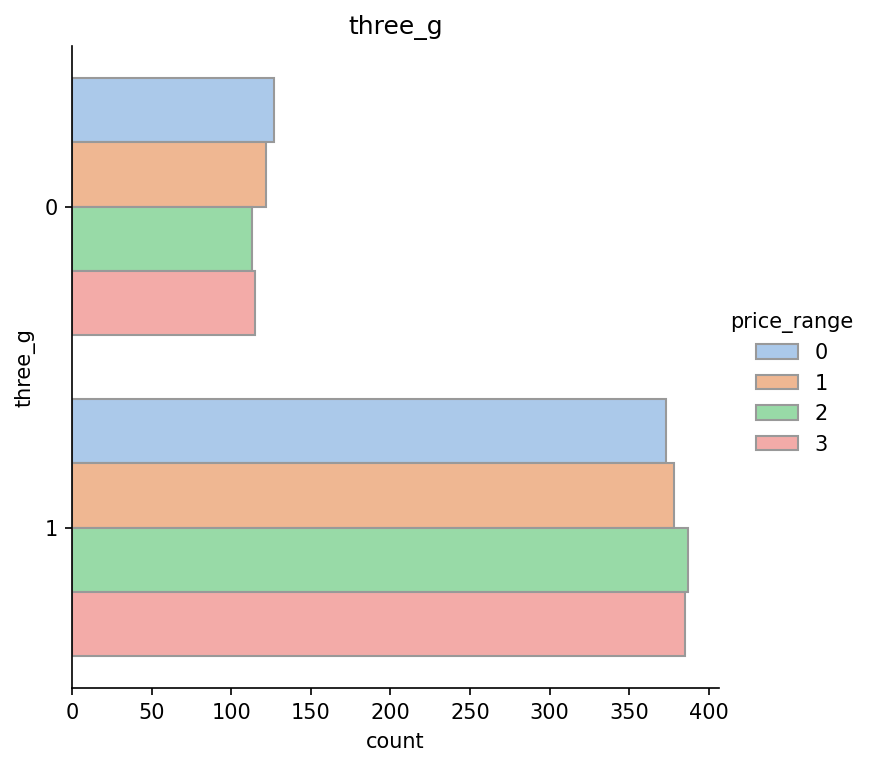

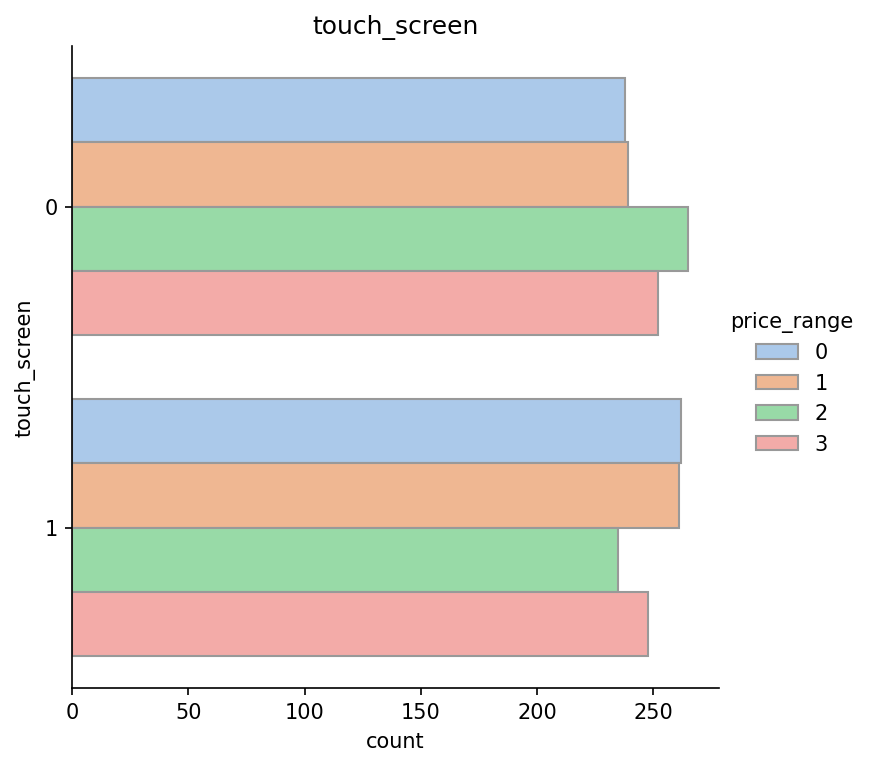

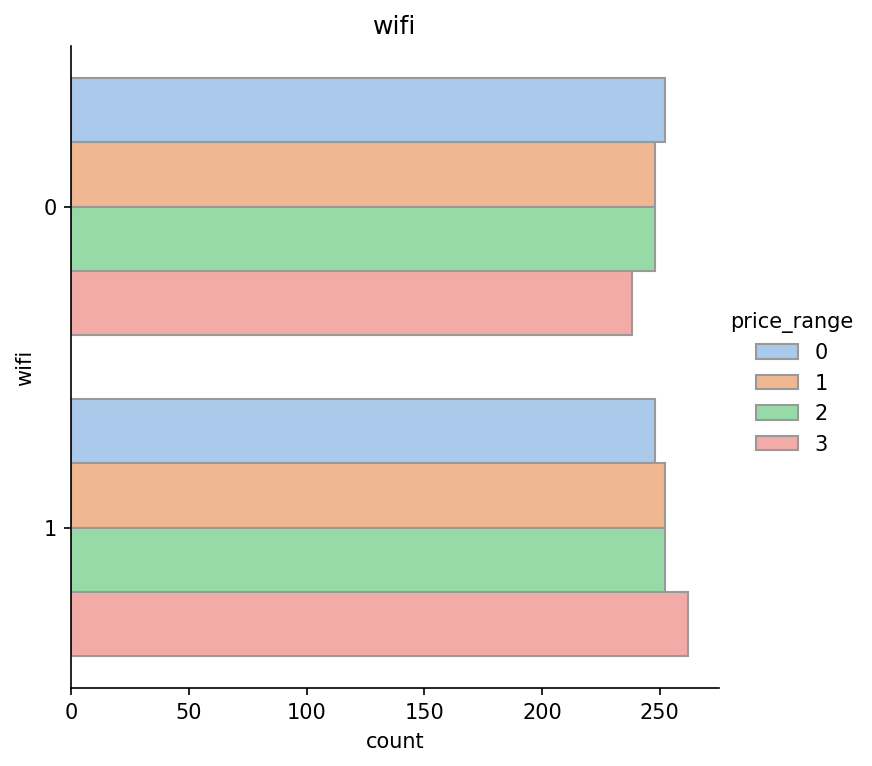

In [101]:
for i in ["blue","dual_sim","four_g","three_g","touch_screen","wifi"]:

  # plotting both barplot and countplot
  #(https://seaborn.pydata.org/tutorial/categorical.html)  
  plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':150})
  sns.catplot(
      data=df, y=i, hue="price_range", kind="count",
      palette="pastel", edgecolor=".6",)
  plt.title(i)

### <font color='orange'>Observation</font>
* execpt features 3G for all of the other features approximate half of the devices in dataset the features are present where half are abset.

### 6. Lets see Scatter Plot between battery power and ram.

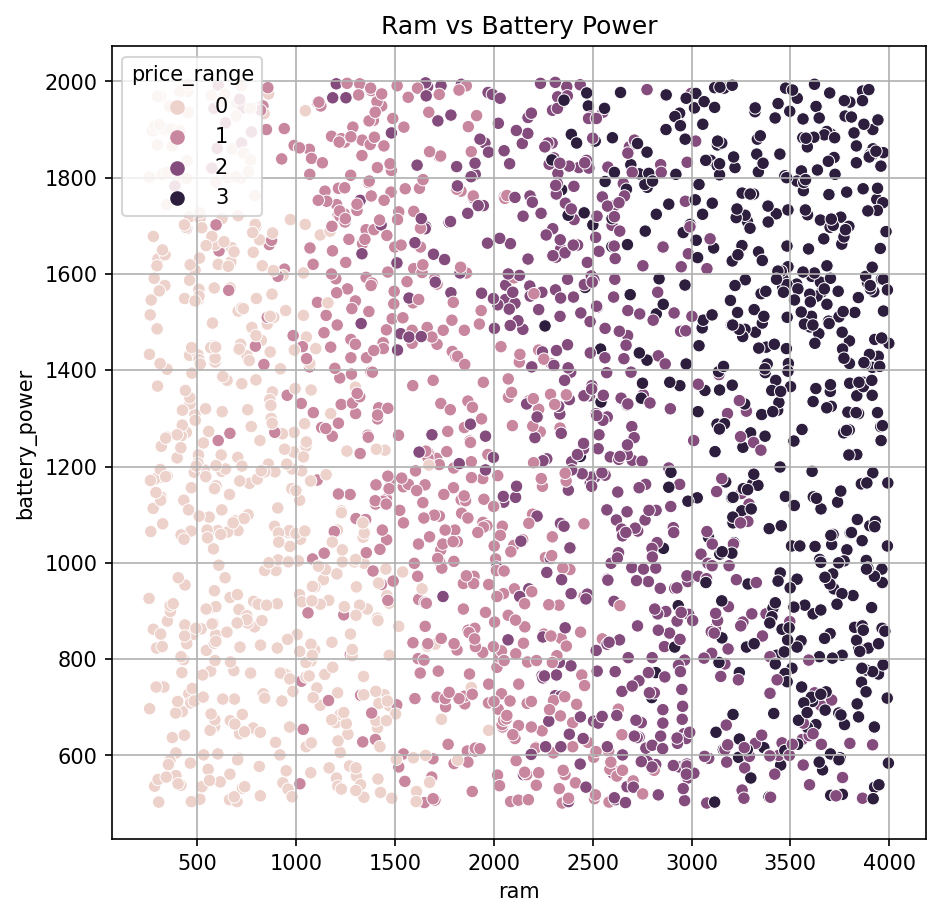

In [102]:
plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':150})
sns.scatterplot(data=df,x="ram",y="battery_power",hue="price_range")
plt.title("Ram vs Battery Power")
plt.grid()
plt.show()

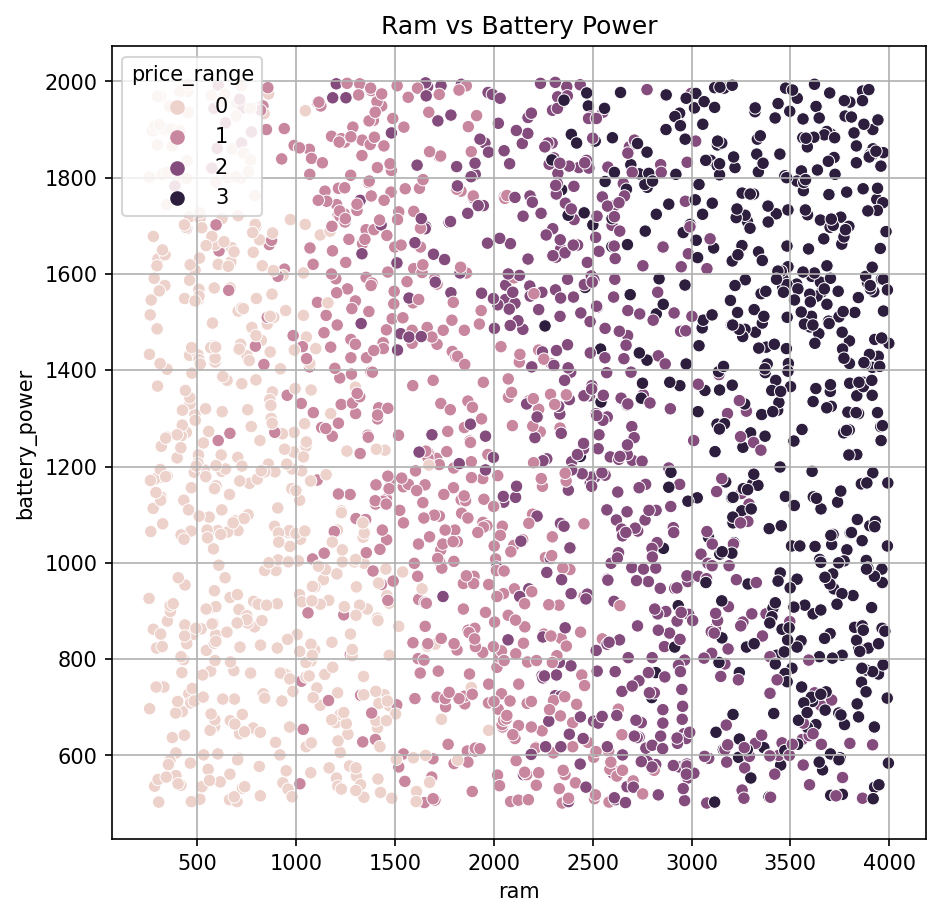

In [103]:
plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':150})
sns.scatterplot(data=df,x="ram",y="battery_power",hue="price_range")
plt.title("Ram vs Battery Power")
plt.grid()
plt.show()

### <font color='orange'>Observation</font>

* Scatterplot with battery power and ram gives much more seperation in datapoints of different classes
* Ram could be most important.

### lets see correlation between various features.

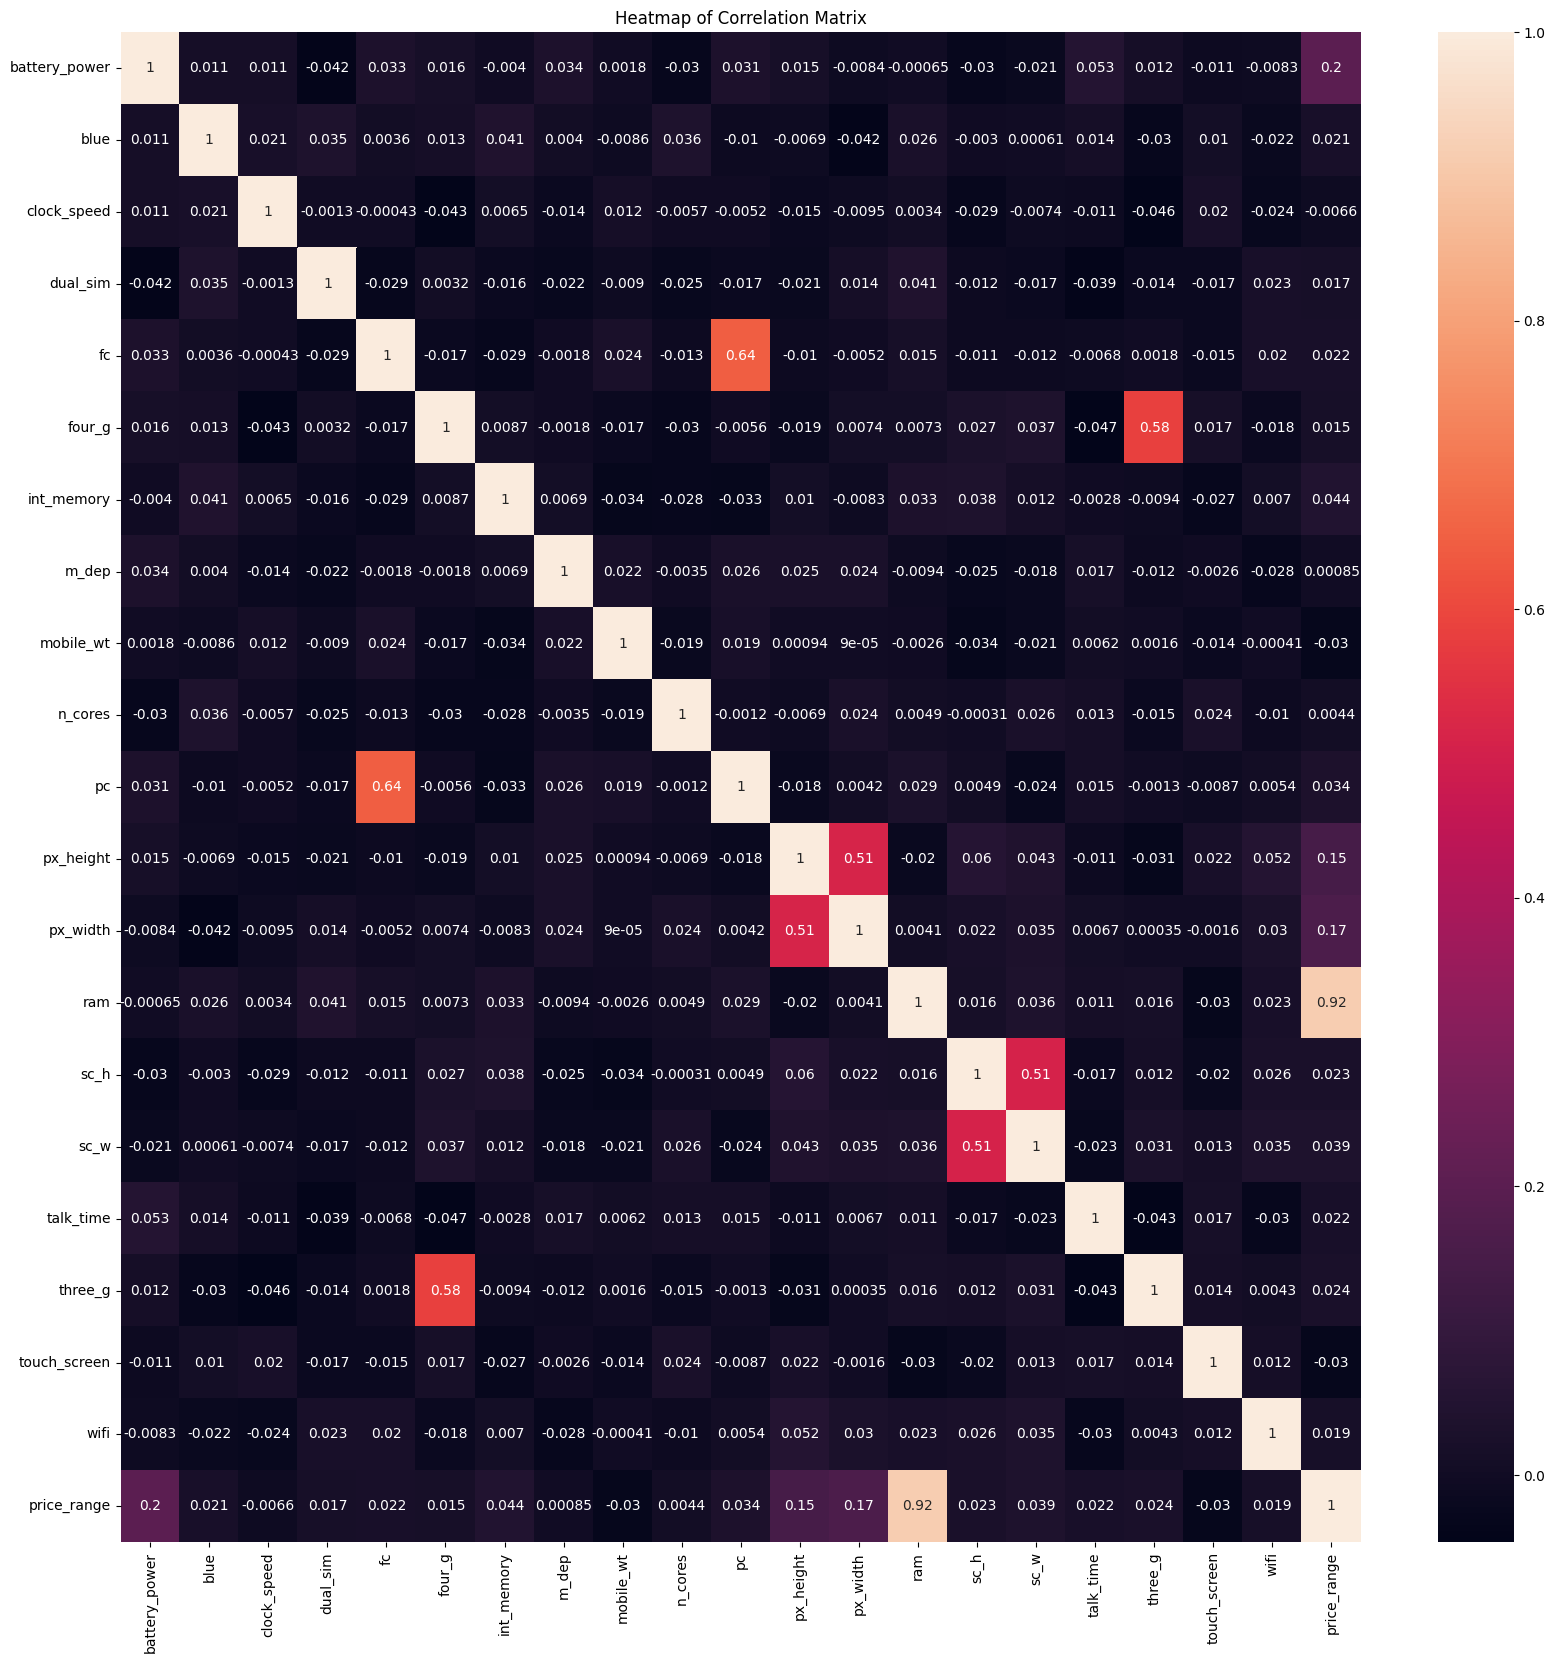

In [104]:
# Increase figure size so it would be understandable
plt.rcParams.update({'figure.figsize':(20,20),'figure.dpi':100})

#correlation matrix
CM=df.corr() 
sns.heatmap(CM,annot=True) 
plt.title("Heatmap of Correlation Matrix") 
plt.show()

### <font color='orange'>Observation</font>

* Ram is highly positively correlated with the price range 
* We can say that ram could be most important features for deciding price range
* Screen height and screen width are highly correlated which is justified
* 3G is also correlated with 4G as phones which has 4G always have 3G.
* Primary camera mega pixels are highly correlated with front camera as phones which has good front camera always has better back camera.
* Mobile height is very very less positively correlated with price range as all phones have enough size to use. 

## **<font color='red'> Clean Up </font>**


### Lets see outliers in various feature with the help of box Plot.

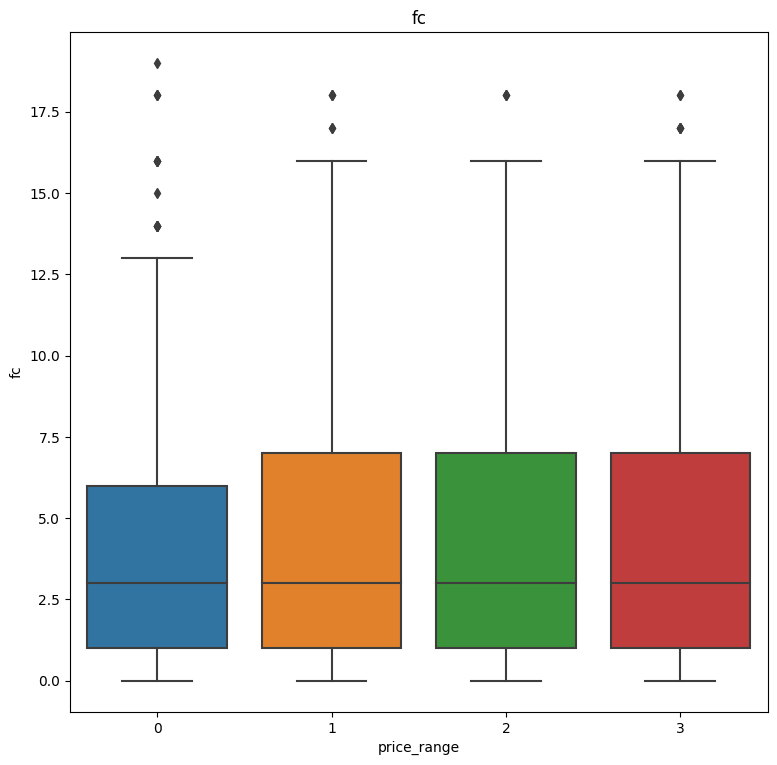

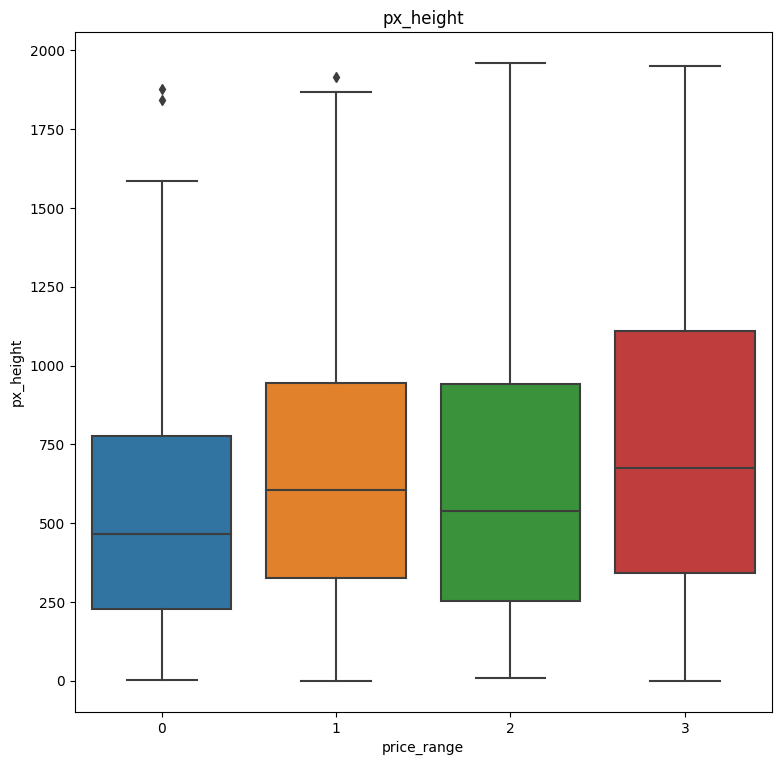

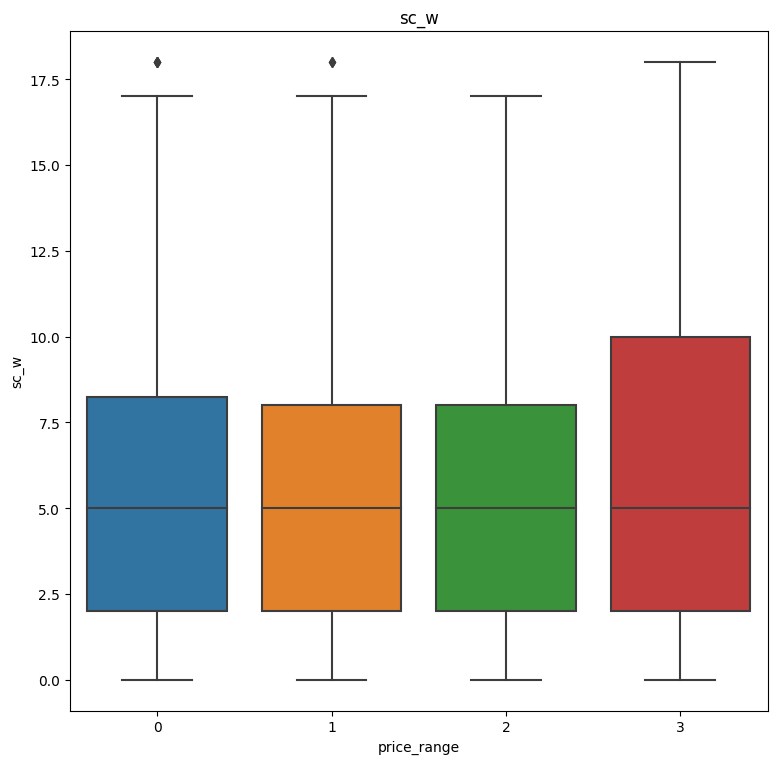

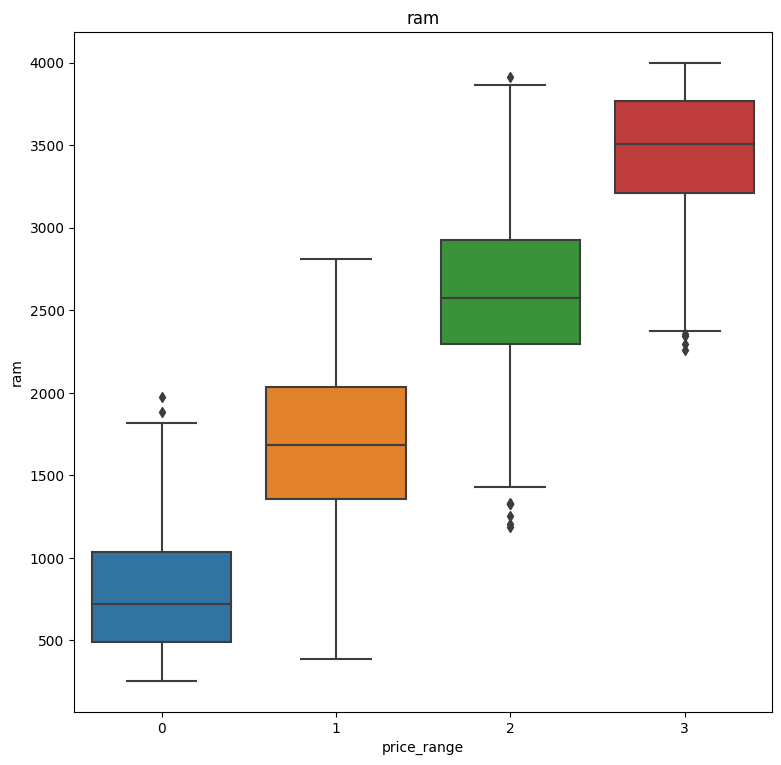

In [105]:
for i in ["fc","px_height","sc_w","ram"]:
  plt.rcParams.update({'figure.figsize':(9,9),'figure.dpi':100})
  # Boxplot
  # (https://seaborn.pydata.org/generated/seaborn.boxplot.html)
  sns.boxplot(x="price_range",y=i,data=df)
  plt.title(i)
  plt.show()

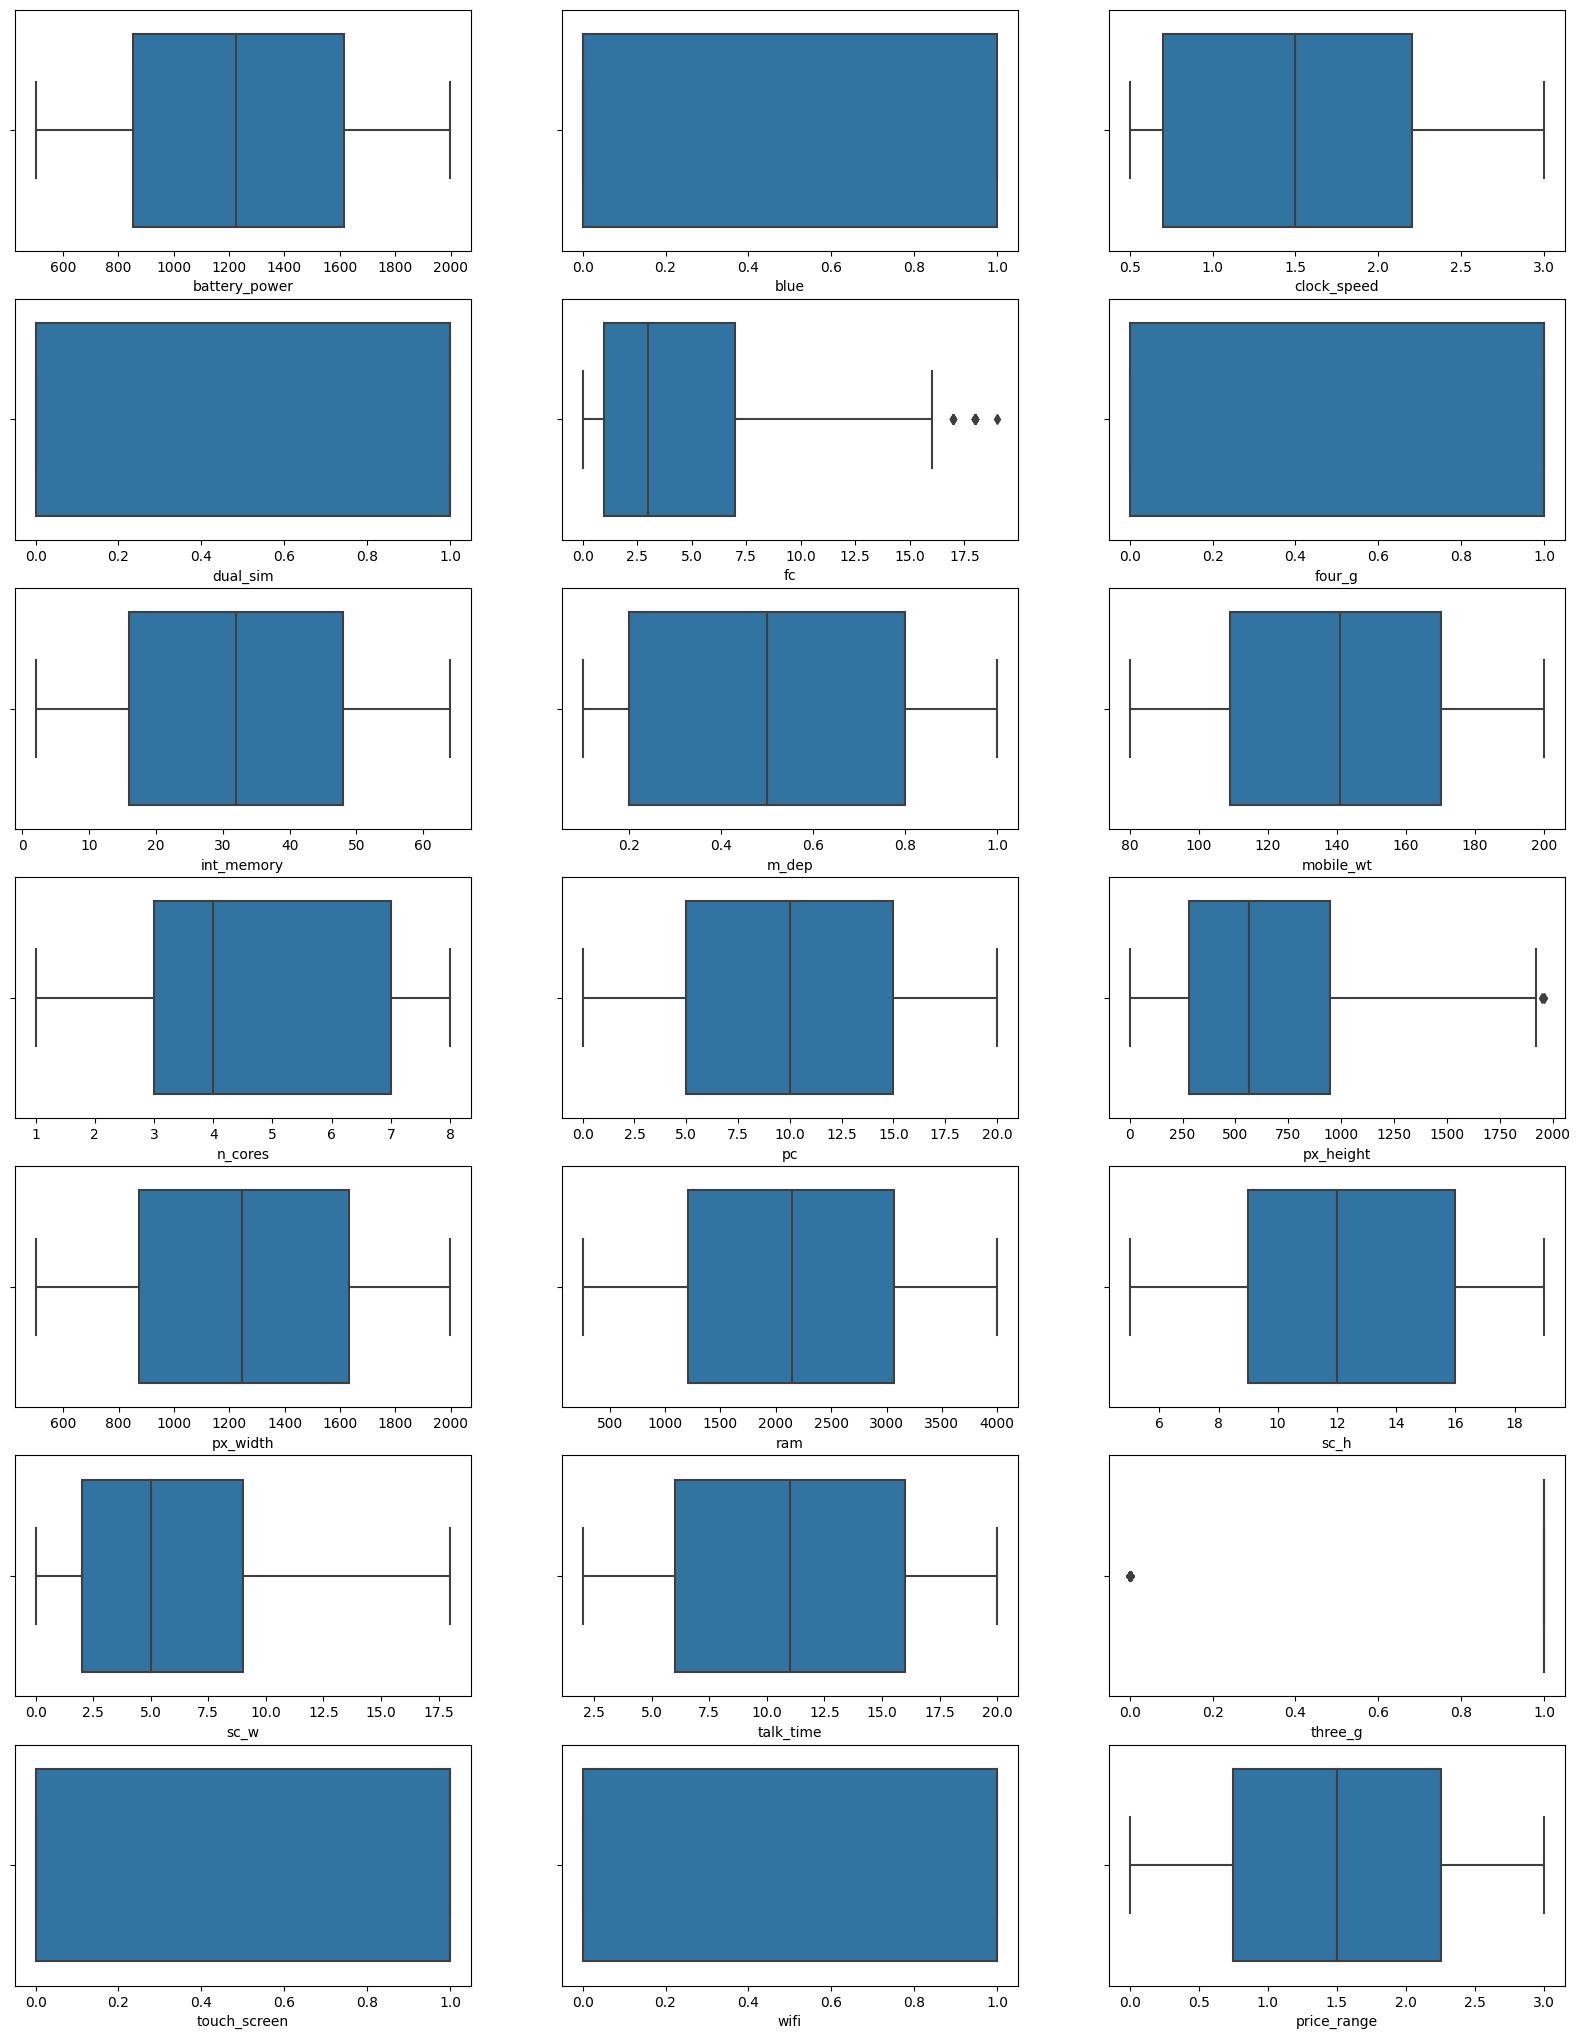

In [106]:
# looking for outliers using box plot
plt.figure(figsize=(20,30))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # many plot in one diagram
  # (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
  plt.subplot(8,3,index+1)
  
  sns.boxplot(df[item])
print("\n")

### <font color='orange'>Observation</font>

* There are not much outliers present in the dataset.
* Cleanup is not mandatory

## **<font color='red'>Feature Engineering</font>**


### Checking Multicollinearity

In [107]:
# Function for Finding vif value 
# (https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b)

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [108]:
compute_vif(list(set(df.columns)-{"price_range"}))

,Variable,VIF
0,battery_power,1.009945
1,m_dep,1.006385
2,touch_screen,1.006278
3,int_memory,1.009274
4,blue,1.011342
5,sc_w,1.353648
6,four_g,1.528509
7,n_cores,1.008442
8,px_width,1.362399
9,pc,1.720785


### <font color='orange'>Observation</font>

* A VIF of 1 will mean that the variables are not correlated; a VIF between 1 and 5 shows that variables are moderately correlated, and a VIF between 5 and 10 will mean that variables are highly correlated.
* So the features are moderately correlated.


###  Creating New features from original features

In [109]:
# pixel = px_width * px_height
# sc_area= sc_h * sc_w

df["pixel"]=df["px_width"]*df["px_height"]
df["sc_area"]= df["sc_w"]* df["sc_h"]

# Droping columns

df.drop(["px_width","px_height","sc_w","sc_h"],axis=1,inplace=True)

In [110]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,pixel,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22


### <font color='red'> Checking Weather Dataset is Imbalance or not </font>
we have to see value count of the dependent variable to check the dataset is imbalance of not

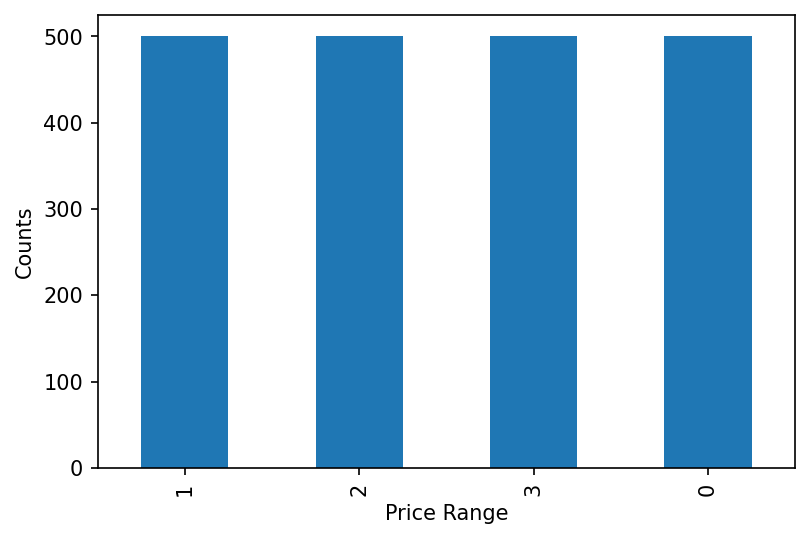

In [111]:
# for adjusting figure size  
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':150})


df['price_range'].value_counts().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()

### <font color='orange'>Observation</font>

*  The given dataset is prefectly balanced with each category of price range has 500 datapoints.

## Train Test split (Random Split)

* There is not presence of datetime feature so we go towards random spliting

In [112]:
# "X" is dataset of independent variables and "Y" is dataset of dependent variables

X=df[list(set(df.columns)-{"price_range"})]
Y=df["price_range"]

In [113]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =2022)

## Feature scaling 

In [114]:
# min max scaling
# (https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn)
from sklearn import preprocessing

In [115]:
# Function for converting columns it min max scaled

from pandas.core.frame import Scalar
def minmaxscaler(df, columns):
  "This will create a new dataset with given columns scaled"
  scaler=preprocessing.MinMaxScaler()
  for col in columns:
    df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
  return df

In [117]:
# Numerical features
Num=["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","ram","talk_time","pixel","sc_area"]

X_train=minmaxscaler(X_train,Num)
X_test=minmaxscaler(X_test,Num)